# Basic feature interrelation analysis using the 'fip3' library

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import csv
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

In [9]:
DATASET_NAME = 'ZINC'
OUTPUT_FIGURE_PATH = '../images/ZINC'

FEATURES_NAME = 'ECFP1-like substructures'

HYBRID_FEATURES_NAME = FEATURES_NAME + " and ZINC activities"


## Loading an interrelation profile
From interrelation files already preprocessed by scripts in fip3/scripts

In [4]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
p.df

value
feature1 feature2       
0        0           814
         1           158
         10            6
         1000          4
         1001          3
...                  ...
997      998          16
         999          44
998      998        2788
         999          63
999      999        4474

[2077720 rows x 1 columns]

## General characterization of a co-occurrence profile

In [5]:
print(f"There are {len(p.distinct_features())} distinct {FEATURES_NAME} within {DATASET_NAME}.")

There are 2048 distinct ECFP1-like substructures within ZINC.


In [6]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1  feature2
0         0             814
1         1           92205
10        10           1689
100       100          1333
1000      1000         2202
                      ...  
995       995          1194
996       996          6790
997       997          6074
998       998          2788
999       999          4474
Name: value, Length: 2048, dtype: int64

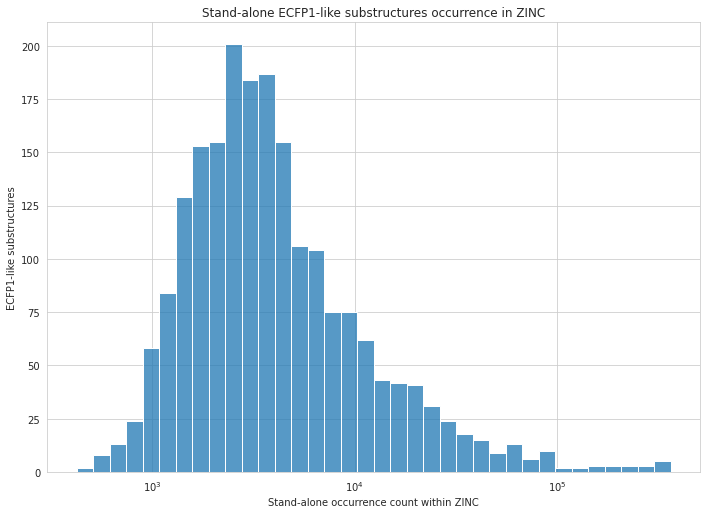

In [10]:
title = f"Stand-alone {FEATURES_NAME} occurrence in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True)
ax.set(title=title, xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [11]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1  feature2
0         1           158
          10            6
          1000          4
          1001          3
          1002          2
                     ... 
996       998         132
          999          57
997       998          16
          999          44
998       999          63
Name: value, Length: 2075672, dtype: int64

In [12]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {DATASET_NAME}")

There is in total 18702696 feature stand-alone occurrences and 485509494 feature co-occurrences for ECFP1-like substructures within ZINC


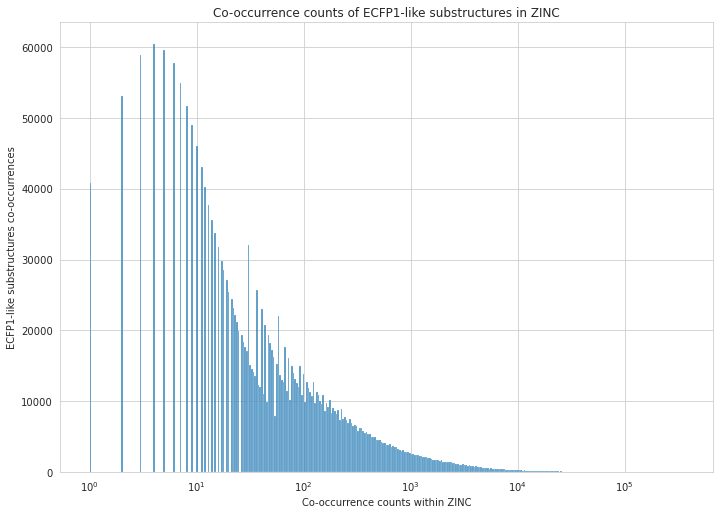

In [13]:
title = f"Co-occurrence counts of {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True)
ax.set(title=title, xlabel=f"Co-occurrence counts within {DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} co-occurrences")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [14]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {DATASET_NAME} would be {int(p.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {p.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {p.num_raw_interrelations() / p.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP1-like substructures within ZINC would be 2096128, whereas the number of actual observed interrelations is only 2075672. Therefore, the interrelation matrix population ratio is approx. 0.9902.


In [15]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP1-like substructures within ZINC is 233.90, with the standard deviation of 2043.31. The mean stand-alone value is 9132.18, with the standard deviation of 25779.01.


## General characterization of pointwise mutual information profile

In [17]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p)
p

In [19]:
p.select_self_relations()['value']

feature1  feature2
0         0           0.002148
1         1           0.243277
10        10          0.004456
100       100         0.003517
1000      1000        0.005810
                        ...   
995       995         0.003150
996       996         0.017915
997       997         0.016026
998       998         0.007356
999       999         0.011804
Name: value, Length: 2048, dtype: float64

In [20]:
p.select_self_relations()['value'].min()

0.0011186980887148692

In [21]:
p.select_raw_interrelations()['value'].min()

2.6384388884784652e-06

In [22]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p

In [23]:
p.df

value
feature1 feature2          
0        0         0.000000
         1        -0.325778
         10        0.726008
         1000     -0.241600
         1001     -1.156592
...                     ...
997      998      -1.481562
         999      -0.704465
998      998       0.000000
         999       0.936800
999      999       0.000000

[2077720 rows x 1 columns]

In [24]:
pmi_values = p.select_raw_interrelations()['value']
pmi_values

feature1  feature2
0         1          -0.325778
          10          0.726008
          1000       -0.241600
          1001       -1.156592
          1002       -0.869168
                        ...   
996       998         1.402067
          999        -0.491771
997       998        -1.481562
          999        -0.704465
998       999         0.936800
Name: value, Length: 2075672, dtype: float64

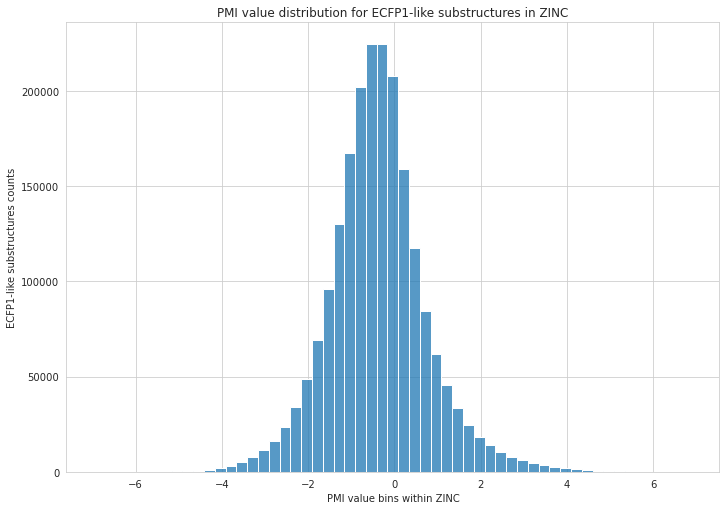

In [25]:
title = f"PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [26]:
print(f"The mean PMI value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean PMI value for ECFP1-like substructures within ZINC is -0.39, with the standard deviation of 1.13. The mean stand-alone value is 0.00, with the standard deviation of 0.00.


In [27]:
major_pmi_values = p.select_major_interrelations(2)['value']
major_pmi_values

feature1  feature2
0         1007       -2.811635
          1022        4.324787
          1037        2.462120
          1053        1.904578
          1059        2.215541
                        ...   
99        995        -2.842622
991       997         1.875250
992       998         2.327566
994       996         3.382826
995       996        -2.833936
Name: value, Length: 118648, dtype: float64

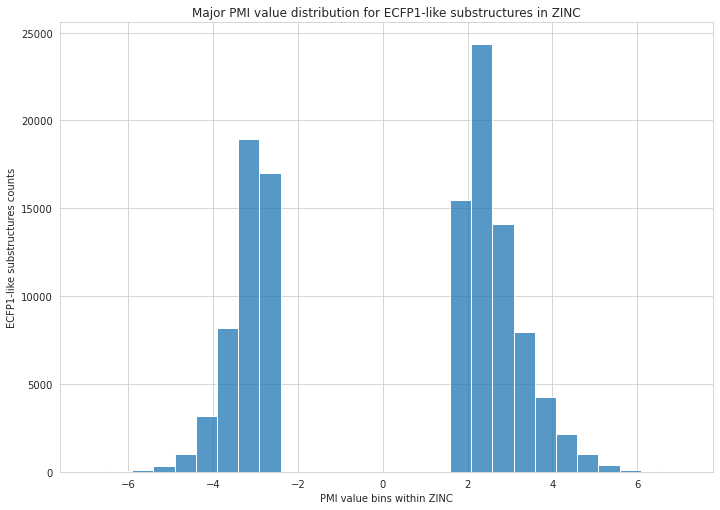

In [28]:
title = f"Major PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=title, xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [29]:
p.mean_raw_interrelation_value()

-0.38965918744704564

## Graph visualization of PMI profile

In [30]:
graph = nx.Graph()
major_pmi_values = p.select_major_interrelations(2)

for feature_pair, value in major_pmi_values[major_pmi_values['value'] > 0].iterrows():
    graph.add_edge(feature_pair[0], feature_pair[1], weight=float(value))
graph

In [31]:
title = f"Kamada-Kawai graph visualization of major PMI interrelations for {FEATURES_NAME} in {DATASET_NAME}"
dims = (40, 40)
fig, ax = plt.subplots(figsize=dims)
nx.draw_kamada_kawai(graph, ax=ax, alpha=0.5, node_size=30, label=title)
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
plt.close()

## Comparing profiles using Pointwise KL Divergence

In [33]:
p = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
p.df

value
feature1 feature2       
0        0           814
         1           158
         10            6
         1000          4
         1001          3
...                  ...
997      998          16
         999          44
998      998        2788
         999          63
999      999        4474

[2077720 rows x 1 columns]

In [34]:
q = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(p)

In [35]:
q.df

value
feature1 feature2          
0        0         0.002148
         1         0.000417
         10        0.000016
         1000      0.000011
         1001      0.000008
...                     ...
997      998       0.000042
         999       0.000116
998      998       0.007356
         999       0.000166
999      999       0.011804

[2077720 rows x 1 columns]

In [36]:
r = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
r.df

value
feature1 feature2       
0        0          3426
         1          1169
         10          153
         100          51
         1000         46
...                  ...
997      998           7
         999          18
998      998        3208
         999          96
999      999        7175

[2096060 rows x 1 columns]

In [37]:
s = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(r)
s.df

value
feature1 feature2          
0        0         0.009039
         1         0.003084
         10        0.000404
         100       0.000135
         1000      0.000121
...                     ...
997      998       0.000018
         999       0.000047
998      998       0.008464
         999       0.000253
999      999       0.018931

[2096060 rows x 1 columns]

In [40]:
k = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(r, s)
k.df

KeyError: 'imputation_value'

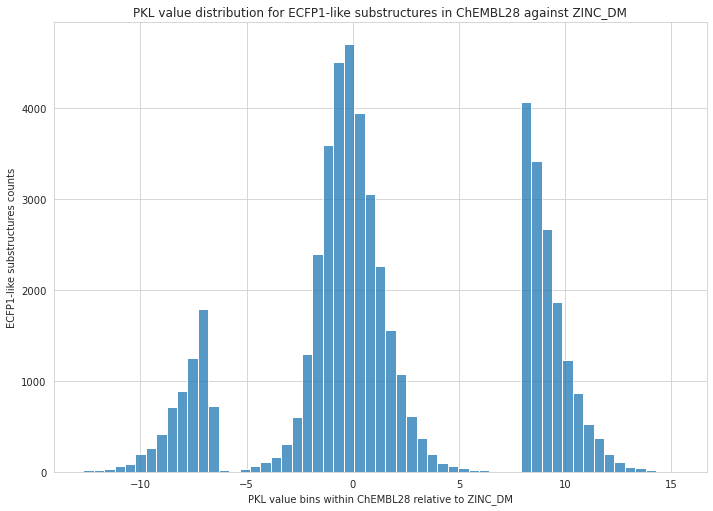

In [74]:
title = f"PKL value distribution for {FEATURES_NAME} in {DATASET_NAME} against {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(k.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PKL value bins within {DATASET_NAME} relative to {REFERENCE_DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [75]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=False)[:100])

,,value
feature1,feature2,
CNO,NO,15.258272
C=N,cC(=N)N,14.596952
CO,OP,14.596381
O=P,cn(c)C,14.561717
CC(n)O,cN,14.511743
N=C(N)N,cc[nH],14.456521
CCS,N=C(N)N,14.437846
N=C(N)N,cc(c)[nH],14.234260
COC,OP,14.195969


In [76]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(k.df.sort_values('value', ascending=True)[:100])

value
feature1      feature2                
C=c(c)s       cBr           -12.684700
              cc(c)Br       -12.664800
CN=c          cBr           -12.654975
CC(C)=C       cI            -12.630021
CN=c          cc(c)Br       -12.628163
CC(C)=C       cc(c)I        -12.605385
cBr           cC=c          -12.604723
cC=c          cc(c)Br       -12.583681
c=NC          c[nH]c        -12.456109
CC(c)N        cC(=C)O       -12.448966
C=c(c)s       cCO           -12.384031
              cC(C)n        -12.381827
N=c(n)s       cC(C)n        -12.378956
cC=c          cCO           -12.377850
N=c(n)s       cCO           -12.338491
N=c([nH])[nH] c[nH]c        -12.319035
              N=c([nH])[nH] -12.319035
              ccc           -12.317190
CN=c          cCO           -12.299546
              cC(C)n        -12.268141
c=NC          cc(=N)[nH]    -12.262520
cC(C)n        cC=c          -12.249521
N=c([nH])[nH] c=NC          -12.196820
              cc(=N)[nH]    -12.193933
CC(c)n        cCO           -12.015312
cc(=N)[nH]    cc(c)N        -11.994108
C=Nn          CC(=O)O       -11.984260
cN=c          cc(=N)[nH]    -11.960377
cc(c)o        cn(c)N        -11.926141
C=Nn          cc(c)o        -11.904036
cC(=C)O       cC(C)N        -11.864319
c-c(c)[nH]    c=NC          -11.846364
N=c([nH])[nH] cc(c)N        -11.837543
              cN=c          -11.787124
C=c(c)s       CC(C)O        -11.770536
c=NC          cN=c          -11.770030
C=Nn          CC(C)O        -11.766486
CS(C)=O       CS(C)=O       -11.748289
              O=S           -11.748289
N=c([nH])[nH] c-c(c)[nH]    -11.742803
c-c(c)[nH]    cc(=N)[nH]    -11.742803
CC(C)O        cC=c          -11.684074
c-c(c)c       cc(=N)[nH]    -11.635121
CS(C)=O       ccc           -11.621918
CC(=N)O       CC(C)=C       -11.563204
C=C(C)N       cI            -11.537884
              cc(c)I        -11.513119
CC(C)N        cc(=N)[nH]    -11.504229
cc(=N)[nH]    cnc           -11.477430
CC(=N)O       cnn           -11.460398
C=c(c)s       [N+]=O        -11.436593
              [N+][O-]      -11.436593
              c[N+](=O)[O-] -11.436381
N=c([nH])[nH] c-c(c)c       -11.431913
CC(C)N        N=c([nH])[nH] -11.431273
CCC           N=c([nH])[nH] -11.430420
cC=c          cc(C)n        -11.421003
CC(=N)O       cc(N)n        -11.415625
C=c(c)s       cc(c)[N+]     -11.403940
              cc(C)n        -11.393692
cC=c          cc(c)[N+]     -11.393692
CN=c          [N+][O-]      -11.370086
              [N+]=O        -11.370086
              c[N+](=O)[O-] -11.369641
c-c(c)[nH]    cN=c          -11.350829
C=c(c)s       cI            -11.332681
cC=c          cI            -11.331540
N=c(n)s       cI            -11.326734
CN=c          cc(c)[N+]     -11.321912
              cI            -11.309903
C=c(c)s       cc(c)I        -11.296624
cC=c          cc(c)I        -11.295453
N=c(n)s       cc(c)I        -11.291230
CN=c          cc(c)I        -11.279910
NC(=S)S       cc(n)=O       -11.275404
C=O           CS(C)=O       -11.274216
CC(=N)O       cc(C)n        -11.258440
C=S           cn(c)c        -11.217489
CS(C)=O       cc(c)C        -11.205572
CC(=C)S       cn(c)c        -11.185237
CF            c=NC          -11.161015
N=c([nH])[nH] cnc           -11.148101
NC(=S)S       cn(c)c        -11.127459
              cc(n)n        -11.124561
N=c([nH])[nH] cc(c)C        -11.111050
CC(=N)O       NC(N)=O       -11.110783
C=c(c)s       cc(c)-n       -11.100631
CCN           cc(=N)[nH]    -11.099290
Cc(n)n        cC(C)S        -11.092296
C#N           cC=c          -11.088786
N=c([nH])[nH] ccn           -11.082827
CO            N=c([nH])[nH] -11.074114
CC(C)N        cN=c          -11.069464
O=S           cS(C)=O       -11.067545
cS(C)=O       cS(C)=O       -11.067545
cC=c          cc(c)-n       -11.063149
cI            cN=C          -11.060119
CCN           N=c([nH])[nH] -11.059568
CC(=C)S       cI            -11.045987
CC            N=c([nH])[nH] -11.044037

## Comparing profiles using Pointwise Jeffreys Divergence

In [77]:
j = profiles.PointwiseJeffreysDivergenceProfile.from_cooccurrence_probability_profiles(p, r)
j.df

value
feature1 feature2           
C=O      C=O        0.391064
         Cc(c)c     0.085153
         c-n(c)n    1.209712
         c=O        1.226971
         cC         2.146210
...                      ...
CC(c)n   cSc       18.572577
         cc(o)S    16.583870
C=C(C)N  cc(-n)s   13.524510
CN=c     cc(-n)s   13.813290
N=c(n)s  cc(-n)s   13.823087

[54003 rows x 1 columns]

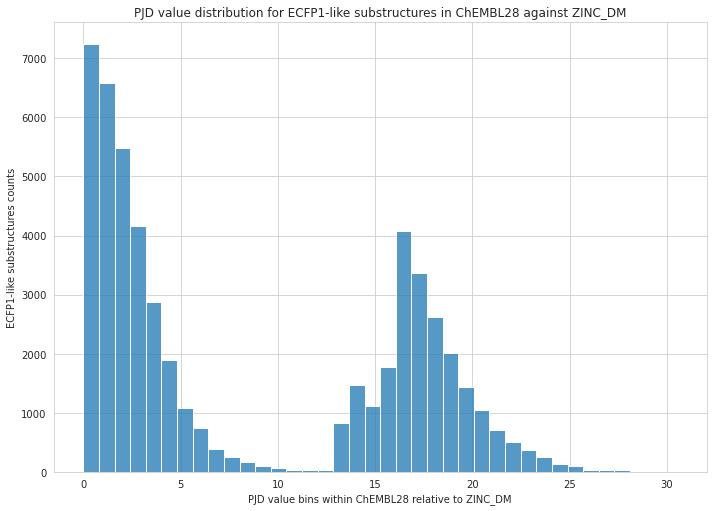

In [78]:
title = f"PJD value distribution for {FEATURES_NAME} in {DATASET_NAME} against {REFERENCE_DATASET_NAME}"
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(j.select_raw_interrelations()['value'])
ax.set(title=title, xlabel=f"PJD value bins within {DATASET_NAME} relative to {REFERENCE_DATASET_NAME}",
       ylabel=f"{FEATURES_NAME} counts")
plt.savefig(f"{OUTPUT_FIGURE_PATH}/{title}.svg", format="svg")
#plt.close()

In [79]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=False)[:100])

,,value
feature1,feature2,
CNO,NO,30.516543
C=N,cC(=N)N,29.193904
CO,OP,29.192762
O=P,cn(c)C,29.123433
CC(n)O,cN,29.023486
N=C(N)N,cc[nH],28.913042
CCS,N=C(N)N,28.875692
N=C(N)N,cc(c)[nH],28.468519
COC,OP,28.391938


In [80]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(j.df.sort_values('value', ascending=True)[:100])

,,value
feature1,feature2,
CC(C)N,cC(C)C,0.000150
CN(C)S,Cc(c)c,0.000164
CCc,cc(c)N,0.000175
COC,cC#N,0.000235
OCO,cc(c)s,0.000258
cC(C)=O,cOC,0.000271
C=CN,cc(c)c,0.000276
cN(c)c,cc(c)N,0.000578
C#N,c-c(n)n,0.000885
